In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [4]:
# Cargar el dataset desde GitHub
url = "https://raw.githubusercontent.com/mlproyecto/doctorado/main/MappingReview.csv"
df = pd.read_csv(url, sep=';', encoding='latin-1')
print(f"Dataset cargado: {df.shape[0]} filas y {df.shape[1]} columnas")

print(f"Columnas disponibles: {df.columns.tolist()}")

Dataset cargado: 89 filas y 8 columnas
Columnas disponibles: ['Title', 'Author(s)', 'Year', 'Publication Title', 'Type of Publication', 'Source', 'DOI', 'Abstract ']


In [5]:
print("=== ANÁLISIS DE BASES DE DATOS UTILIZADAS ===")
print(f"Total de publicaciones analizadas: {len(df)}")

# Contar publicaciones por fuente/base de datos
source_counts = df['Source'].value_counts()
print("\nDistribución de publicaciones por base de datos:")
print(source_counts)

# Calcular porcentajes
source_percentages = (source_counts / len(df)) * 100
print("\nPorcentajes por base de datos:")
for source, count in source_counts.items():
    percentage = source_percentages[source]
    print(f"{source}: {count} publicaciones ({percentage:.1f}%)")

=== ANÁLISIS DE BASES DE DATOS UTILIZADAS ===
Total de publicaciones analizadas: 89

Distribución de publicaciones por base de datos:
Source
Scopus    44
WoS       21
Eric      18
IEEE       6
Name: count, dtype: int64

Porcentajes por base de datos:
Scopus: 44 publicaciones (49.4%)
WoS: 21 publicaciones (23.6%)
Eric: 18 publicaciones (20.2%)
IEEE: 6 publicaciones (6.7%)


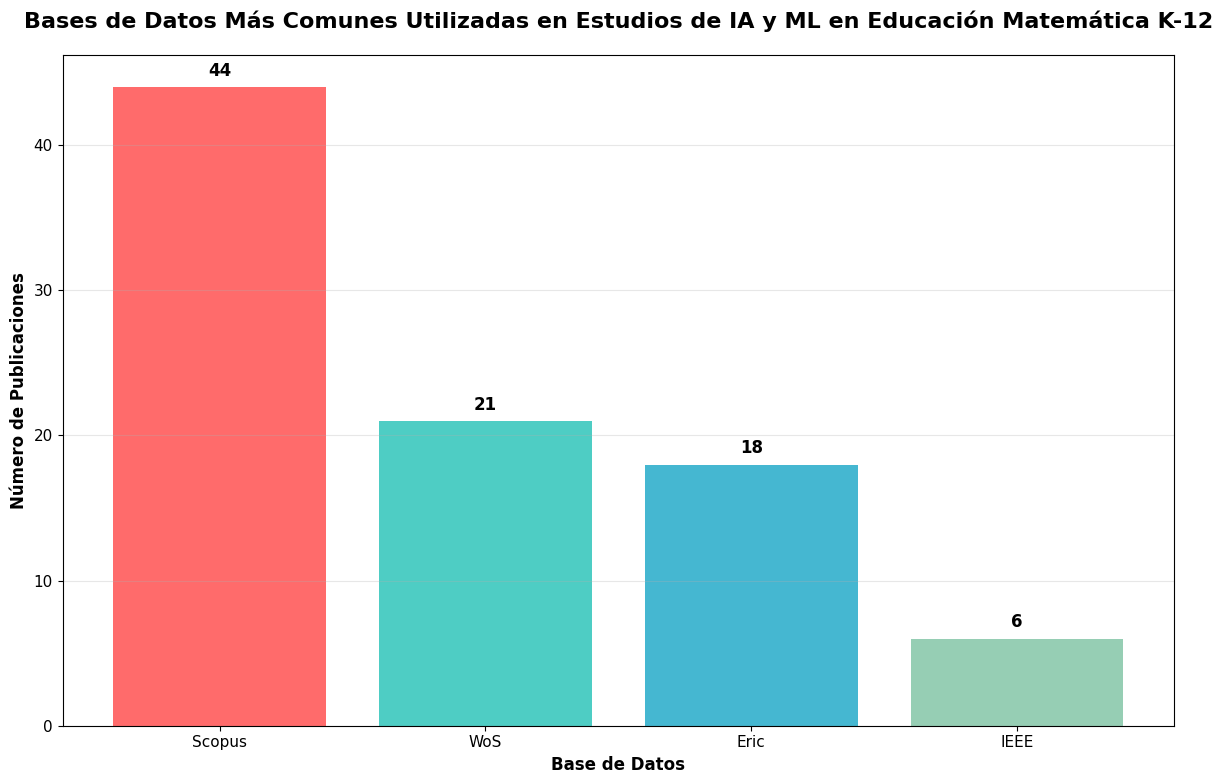

In [6]:
plt.figure(figsize=(12, 8))
bars = plt.bar(source_counts.index, source_counts.values, 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])

# Agregar valores en las barras
for bar, count in zip(bars, source_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{count}', ha='center', va='bottom', fontweight='bold')

plt.title('Bases de Datos Más Comunes Utilizadas en Estudios de IA y ML en Educación Matemática K-12', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Base de Datos', fontsize=12, fontweight='bold')
plt.ylabel('Número de Publicaciones', fontsize=12, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

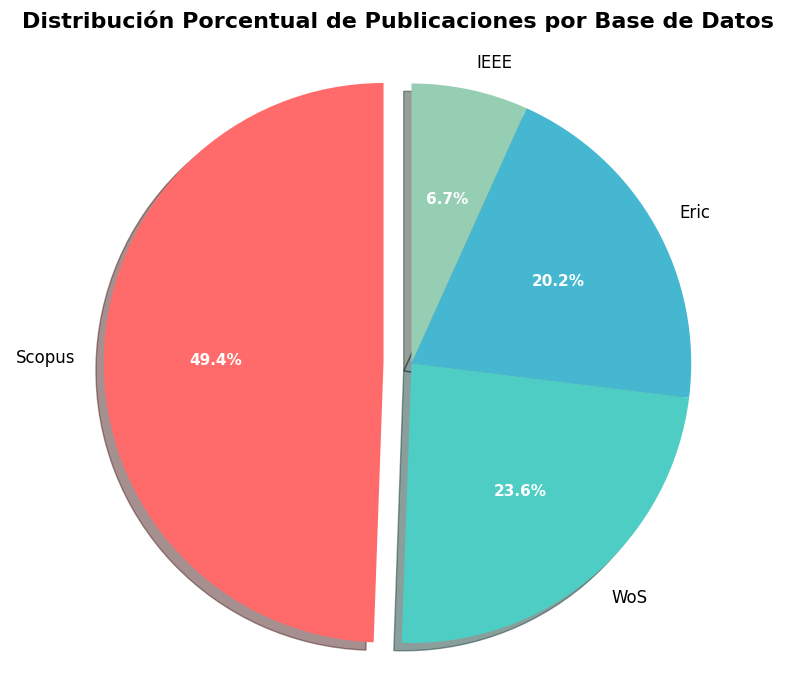

In [7]:
plt.figure(figsize=(10, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
explode = (0.1, 0, 0, 0)  # Destacar Scopus

wedges, texts, autotexts = plt.pie(source_counts.values, 
                                  labels=source_counts.index,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  colors=colors,
                                  explode=explode,
                                  shadow=True)

# Mejorar el formato del texto
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.title('Distribución Porcentual de Publicaciones por Base de Datos', 
          fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.show()

=== ANÁLISIS TEMPORAL POR BASE DE DATOS ===

Evolución temporal por base de datos:
Source  Eric  IEEE  Scopus  WoS
Year                           
2020       0     0       4    0
2021       3     1       2    0
2022       4     1       7    2
2023       4     2       5    3
2024       4     2      17   12
2025       3     0       9    4


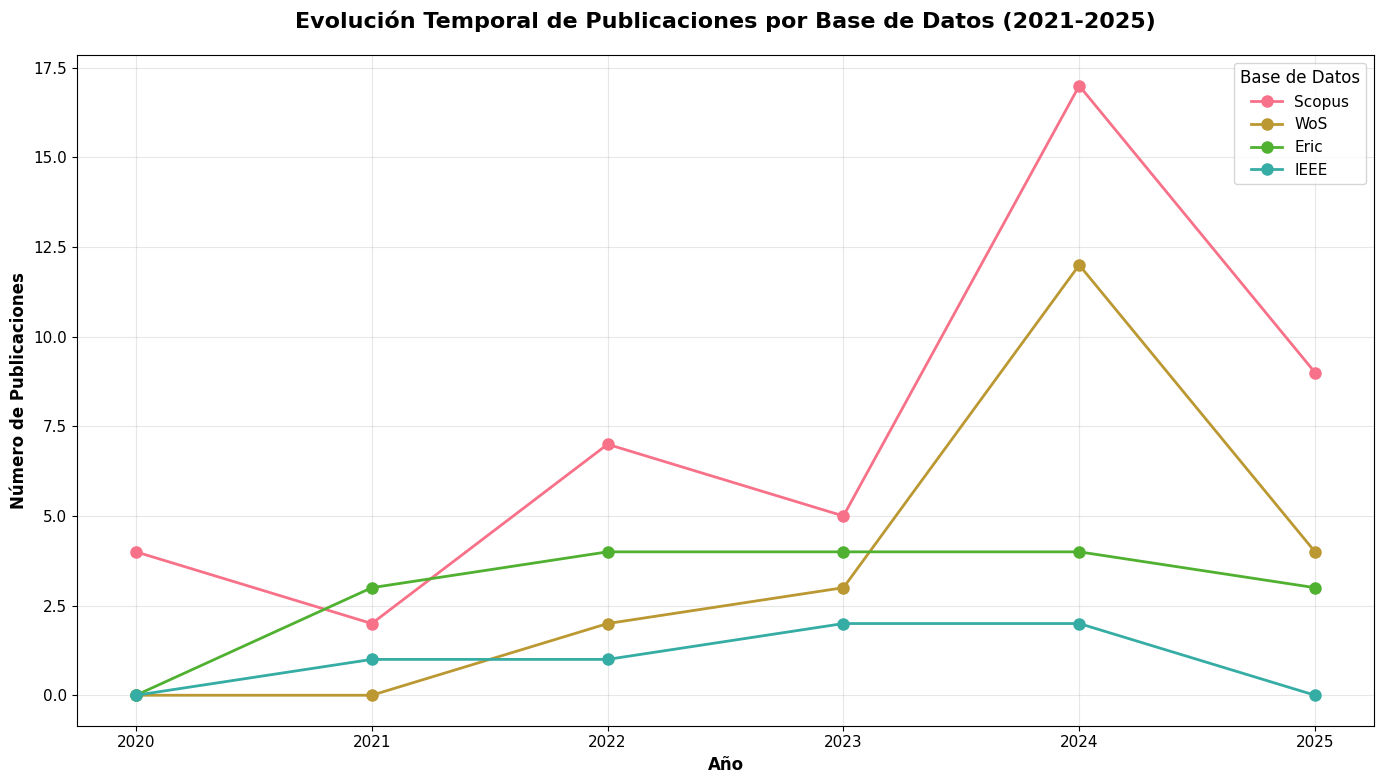

In [8]:
print("=== ANÁLISIS TEMPORAL POR BASE DE DATOS ===")

# Crear tabla cruzada de año vs fuente
year_source_cross = pd.crosstab(df['Year'], df['Source'])
print("\nEvolución temporal por base de datos:")
print(year_source_cross)

# Gráfico de evolución temporal
plt.figure(figsize=(14, 8))
for source in source_counts.index:
    yearly_data = year_source_cross[source]
    plt.plot(yearly_data.index, yearly_data.values, 
             marker='o', linewidth=2, markersize=8, label=source)

plt.title('Evolución Temporal de Publicaciones por Base de Datos (2021-2025)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Año', fontsize=12, fontweight='bold')
plt.ylabel('Número de Publicaciones', fontsize=12, fontweight='bold')
plt.legend(title='Base de Datos', title_fontsize=12, fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

=== ANÁLISIS DE TIPOS DE PUBLICACIÓN POR BASE DE DATOS ===

Tipos de publicación por base de datos:
Source               Eric  IEEE  Scopus  WoS
Type of Publication                         
Article                18     0      13   21
Book chapter            0     0       4    0
Conference              0     6      27    0


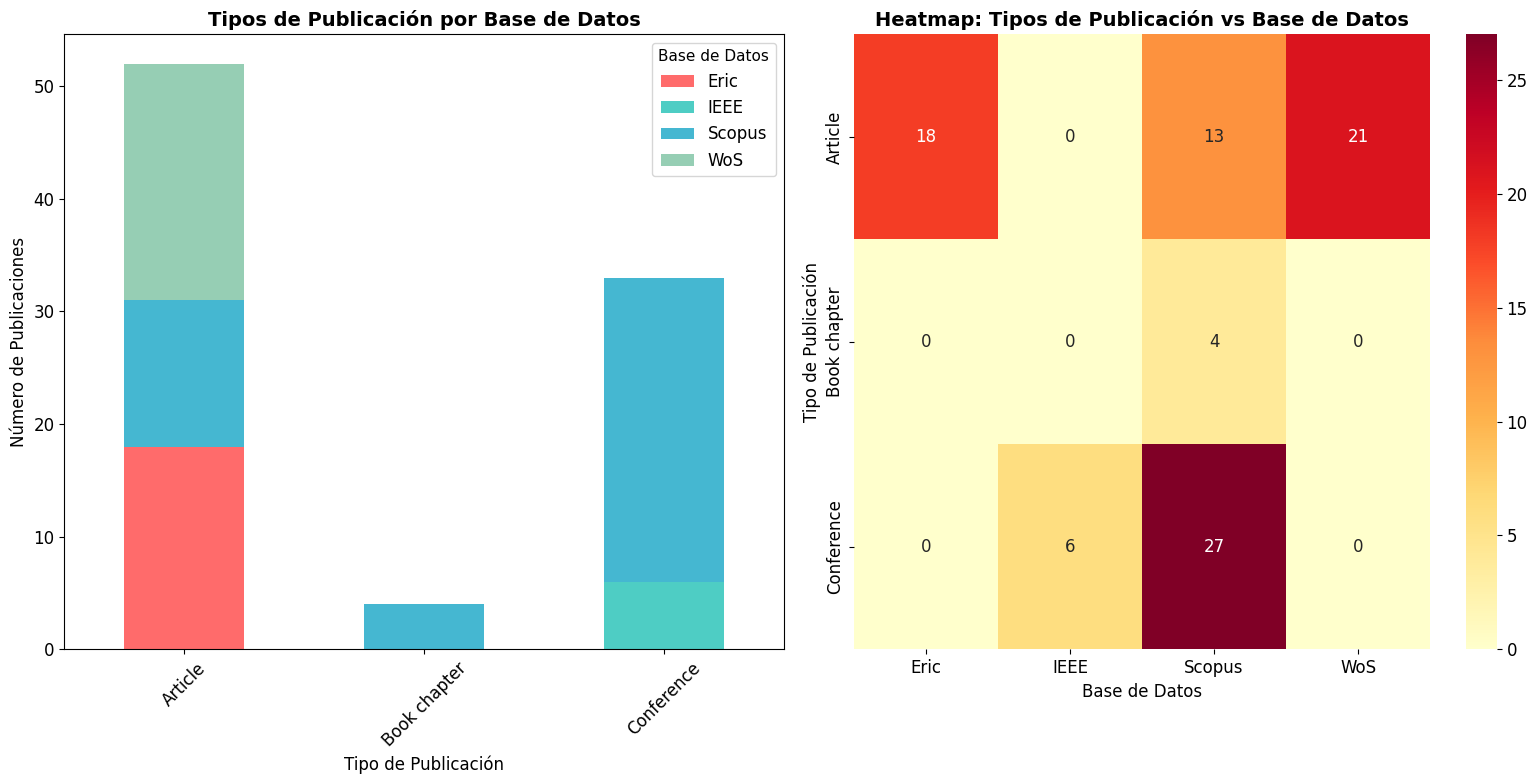

In [9]:
print("=== ANÁLISIS DE TIPOS DE PUBLICACIÓN POR BASE DE DATOS ===")

# Tabla cruzada de tipo de publicación vs fuente
pubtype_source_cross = pd.crosstab(df['Type of Publication'], df['Source'])
print("\nTipos de publicación por base de datos:")
print(pubtype_source_cross)

# Gráfico de barras apiladas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico 1: Barras apiladas
pubtype_source_cross.plot(kind='bar', stacked=True, ax=ax1, 
                         color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
ax1.set_title('Tipos de Publicación por Base de Datos', fontsize=14, fontweight='bold')
ax1.set_xlabel('Tipo de Publicación', fontsize=12)
ax1.set_ylabel('Número de Publicaciones', fontsize=12)
ax1.legend(title='Base de Datos', title_fontsize=11)
ax1.tick_params(axis='x', rotation=45)

# Gráfico 2: Heatmap
sns.heatmap(pubtype_source_cross, annot=True, fmt='d', cmap='YlOrRd', ax=ax2)
ax2.set_title('Heatmap: Tipos de Publicación vs Base de Datos', fontsize=14, fontweight='bold')
ax2.set_xlabel('Base de Datos', fontsize=12)
ax2.set_ylabel('Tipo de Publicación', fontsize=12)

plt.tight_layout()
plt.show()

In [10]:
print("=== CONCLUSIONES DE MQ5 ===")
print("¿Cuáles son las bases de datos más comunes utilizadas en los estudios de IA y ML en educación matemática K-12?")

print(f"\nRESPUESTA:")
print(f"Basado en el análisis de {len(df)} publicaciones científicas:")

# Identificar la base de datos dominante
dominant_source = source_counts.index[0]
dominant_count = source_counts.iloc[0]
dominant_percentage = source_percentages.iloc[0]

print(f"\n1. BASE DE DATOS DOMINANTE: {dominant_source}")
print(f"   - {dominant_count} publicaciones ({dominant_percentage:.1f}% del total)")
print(f"   - Representa casi la mitad de todas las publicaciones analizadas")

print(f"\n2. RANKING COMPLETO DE BASES DE DATOS:")
for i, (source, count) in enumerate(source_counts.items(), 1):
    percentage = source_percentages[source]
    print(f"   {i}. {source}: {count} publicaciones ({percentage:.1f}%)")

print(f"\n3. DISTRIBUCIÓN:")
print(f"   - Bases de datos principales: {', '.join(source_counts.index[:2])}")
print(f"   - Bases de datos secundarias: {', '.join(source_counts.index[2:])}")

print(f"\n4. IMPLICACIONES:")
print(f"   - {dominant_source} es la fuente más importante para investigación en este campo")
print(f"   - Las 4 bases de datos cubren el 100% de las publicaciones analizadas")
print(f"   - Existe una concentración significativa en {dominant_source}")

print(f"\n5. RECOMENDACIONES:")
print(f"   - Priorizar búsquedas en {dominant_source} para estudios futuros")
print(f"   - Considerar {', '.join(source_counts.index[1:3])} como fuentes complementarias")
print(f"   - Incluir {source_counts.index[-1]} para cobertura especializada")

=== CONCLUSIONES DE MQ5 ===
¿Cuáles son las bases de datos más comunes utilizadas en los estudios de IA y ML en educación matemática K-12?

RESPUESTA:
Basado en el análisis de 89 publicaciones científicas:

1. BASE DE DATOS DOMINANTE: Scopus
   - 44 publicaciones (49.4% del total)
   - Representa casi la mitad de todas las publicaciones analizadas

2. RANKING COMPLETO DE BASES DE DATOS:
   1. Scopus: 44 publicaciones (49.4%)
   2. WoS: 21 publicaciones (23.6%)
   3. Eric: 18 publicaciones (20.2%)
   4. IEEE: 6 publicaciones (6.7%)

3. DISTRIBUCIÓN:
   - Bases de datos principales: Scopus, WoS
   - Bases de datos secundarias: Eric, IEEE

4. IMPLICACIONES:
   - Scopus es la fuente más importante para investigación en este campo
   - Las 4 bases de datos cubren el 100% de las publicaciones analizadas
   - Existe una concentración significativa en Scopus

5. RECOMENDACIONES:
   - Priorizar búsquedas en Scopus para estudios futuros
   - Considerar WoS, Eric como fuentes complementarias
   -

In [11]:
print("\n=== RESUMEN EJECUTIVO MQ5 ===")
print("PREGUNTA: ¿Cuáles son las bases de datos más comunes utilizadas en los estudios de IA y ML en educación matemática K-12?")

print(f"\nRESPUESTA PRINCIPAL:")
print(f"Scopus es la base de datos más común, con {dominant_count} publicaciones ({dominant_percentage:.1f}%), seguida por WoS ({source_counts.iloc[1]} publicaciones, {source_percentages.iloc[1]:.1f}%), Eric ({source_counts.iloc[2]} publicaciones, {source_percentages.iloc[2]:.1f}%) e IEEE ({source_counts.iloc[3]} publicaciones, {source_percentages.iloc[3]:.1f}%).")

print(f"\nDATOS CLAVE:")
print(f"- Total de publicaciones analizadas: {len(df)}")
print(f"- Número de bases de datos identificadas: {len(source_counts)}")
print(f"- Base de datos con mayor cobertura: {dominant_source}")
print(f"- Distribución: {dominant_source} domina con casi la mitad de las publicaciones")

print(f"\nMETODOLOGÍA:")
print(f"- Análisis de la columna 'Source' del dataset")
print(f"- Cálculo de frecuencias y porcentajes")
print(f"- Visualización mediante gráficos de barras y pastel")
print(f"- Análisis temporal y por tipo de publicación")


=== RESUMEN EJECUTIVO MQ5 ===
PREGUNTA: ¿Cuáles son las bases de datos más comunes utilizadas en los estudios de IA y ML en educación matemática K-12?

RESPUESTA PRINCIPAL:
Scopus es la base de datos más común, con 44 publicaciones (49.4%), seguida por WoS (21 publicaciones, 23.6%), Eric (18 publicaciones, 20.2%) e IEEE (6 publicaciones, 6.7%).

DATOS CLAVE:
- Total de publicaciones analizadas: 89
- Número de bases de datos identificadas: 4
- Base de datos con mayor cobertura: Scopus
- Distribución: Scopus domina con casi la mitad de las publicaciones

METODOLOGÍA:
- Análisis de la columna 'Source' del dataset
- Cálculo de frecuencias y porcentajes
- Visualización mediante gráficos de barras y pastel
- Análisis temporal y por tipo de publicación
